In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

## Neural Net Method

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
abc = 'abcdefghijklmnopqrstuvwxyz'
stoi = {s: i+1 for i, s in enumerate(abc)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [4]:
xs, ys = [], []
for w in words:
    w = '..' + w + '.'
    for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
        xs.append([stoi[ch1], stoi[ch2]])
        ys.append(stoi[ch3])

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = ys.nelement()
print('Number of elements:', num)

Number of elements: 228146


In [5]:
g = torch.Generator().manual_seed(123456789)
W = torch.randn((27*2, 27), generator=g, requires_grad=True)
W[0]

tensor([ 0.2643, -0.4149, -0.6075,  0.7319, -0.1569, -0.8602, -0.8462, -0.3094,
        -0.9846,  1.3006, -1.5222,  0.6169,  1.0747,  0.0317, -1.2312,  1.2970,
        -1.4020, -0.7056,  1.4701,  0.0147,  0.6378,  1.3168,  1.2772,  0.0794,
        -0.4374,  0.3369,  0.6316], grad_fn=<SelectBackward0>)

In [12]:
arr = []
n = 1000
for k in range(1, n+1):
    xenc = F.one_hot(xs, num_classes=27).float().view(-1,2*27)
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num),ys].log().mean()
    arr.append(loss.detach())

    W.grad = None
    loss.backward()

    W.data -= 10 * W.grad

    if k%50 == 0:
        print(k, loss)

print(k, loss)

50 tensor(2.3765, grad_fn=<NegBackward0>)
100 tensor(2.3712, grad_fn=<NegBackward0>)
150 tensor(2.3670, grad_fn=<NegBackward0>)
200 tensor(2.3637, grad_fn=<NegBackward0>)
250 tensor(2.3610, grad_fn=<NegBackward0>)
300 tensor(2.3587, grad_fn=<NegBackward0>)
350 tensor(2.3567, grad_fn=<NegBackward0>)
400 tensor(2.3551, grad_fn=<NegBackward0>)
450 tensor(2.3536, grad_fn=<NegBackward0>)
500 tensor(2.3524, grad_fn=<NegBackward0>)
550 tensor(2.3513, grad_fn=<NegBackward0>)
600 tensor(2.3503, grad_fn=<NegBackward0>)
650 tensor(2.3494, grad_fn=<NegBackward0>)
700 tensor(2.3486, grad_fn=<NegBackward0>)
750 tensor(2.3479, grad_fn=<NegBackward0>)
800 tensor(2.3473, grad_fn=<NegBackward0>)
850 tensor(2.3467, grad_fn=<NegBackward0>)
900 tensor(2.3461, grad_fn=<NegBackward0>)
950 tensor(2.3457, grad_fn=<NegBackward0>)
1000 tensor(2.3452, grad_fn=<NegBackward0>)
1000 tensor(2.3452, grad_fn=<NegBackward0>)


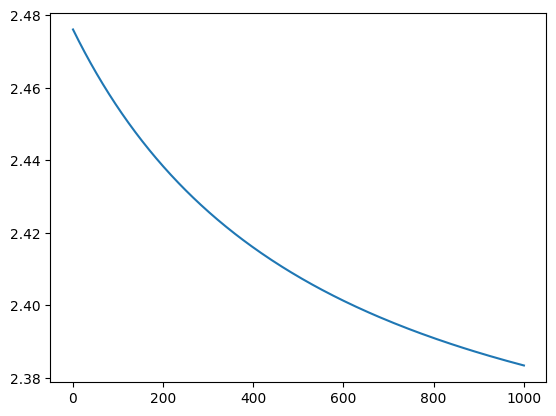

In [11]:
plt.plot(range(1, len(arr)+1), arr)

In [17]:
x1, x2 = 0, 0

for _ in range(5):
    s = ''
    while True:
        xenc = F.one_hot(torch.tensor([x1, x2]), num_classes=27).float().view(-1,2*27)
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)
        
        val = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
        x1, x2 = x2, val

        s += itos[val]
        if val == 0: break

    print(s)

aldevana.
caigelle.
tuna.
kale.
galiyunir.


## Prob Way

### To-do Later